In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import numpy as np

directory = '/home/emartini/nas/MAEVE/HUMAN_MODEL/exoskeleton/new_results/'

### Angular Displacement

In [69]:
subject = 's1'
action = 'acting1'
hz = [9999999,60,10,5]
hz = [9999999,5]
joints = ["34"]
# joints = ["33","34"]
our = []
for h in hz:
    our.append(pd.read_csv(os.path.join(directory,'metrics_our_'+str(h),f"{subject}_{action}",'calc')))
gt = pd.read_csv(os.path.join(directory,'metrics_our_1',f"{subject}_{action}",'gt'))
print(os.path.join(directory,'metrics_our_'+str(h),f"{subject}_{action}"))

/home/emartini/nas/MAEVE/HUMAN_MODEL/exoskeleton/new_results/metrics_our_5/s1_acting1


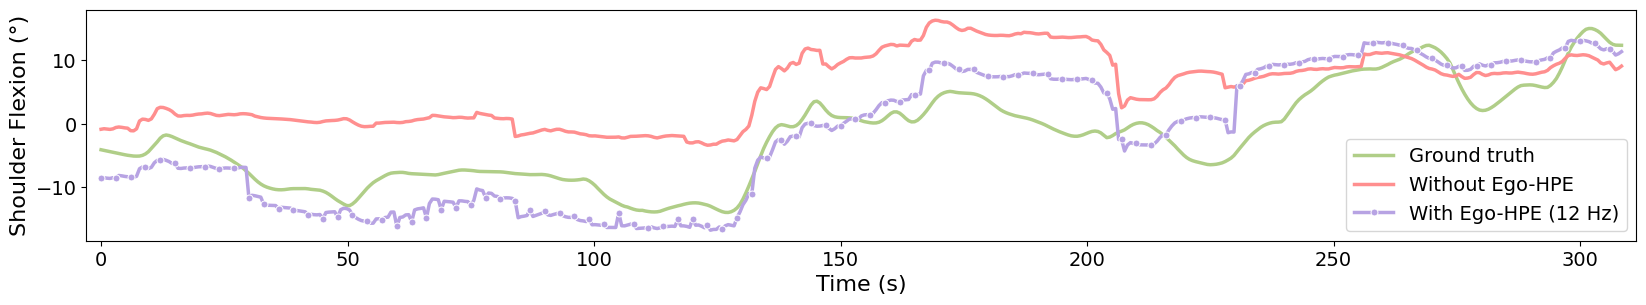

In [196]:
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'sans-serif',             # O 'sans-serif' se preferisci Arial
    'font.serif': ['Times New Roman'],  # Font classico per paper (IEEE/Springer)
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.figsize': (20, 3),          # Aspect ratio più standard per colonne di paper
    'lines.linewidth': 2.5              # Linee più spesse per visibilità
})

joint = "34"
endpoints=(790,790+515)
x_axis = np.arange(endpoints[1]-endpoints[0])*.6
zero = pd.read_csv(os.path.join(directory,'metrics_our_'+str(9999999),f"{subject}_{action}",'calc'))
hpe = pd.read_csv(os.path.join(directory,'metrics_our_'+str(5),f"{subject}_{action}",'calc'))
fig = plt.plot(x_axis,np.degrees(gt[joint].to_numpy()[endpoints[0]:endpoints[1]]),color="#B0CE88",label="Ground truth")
plt.plot(x_axis,np.degrees(zero[joint].to_numpy()[endpoints[0]:endpoints[1]]),label=f"Without Ego-HPE",color="#FF8F8F")
plt.plot(x_axis,np.degrees(hpe[joint].to_numpy()[endpoints[0]:endpoints[1]]),label=f"With Ego-HPE (12 Hz)",marker="o", color="#B7A3E3", markevery=5,markersize=5, markeredgecolor='white', # Bordo bianco per staccare il marker dalla linea
        markeredgewidth=.7,)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Shoulder Flexion (°)") # Usa LaTeX per il grado
plt.xlim([x_axis[0]-3,x_axis[-1]+3])
fig = plt.gcf()
# fig.set_size_inches(20.5, 5)
fig.savefig('tmp/angle.pdf',dpi=300, bbox_inches='tight')

TypeError: 'AxesSubplot' object is not subscriptable

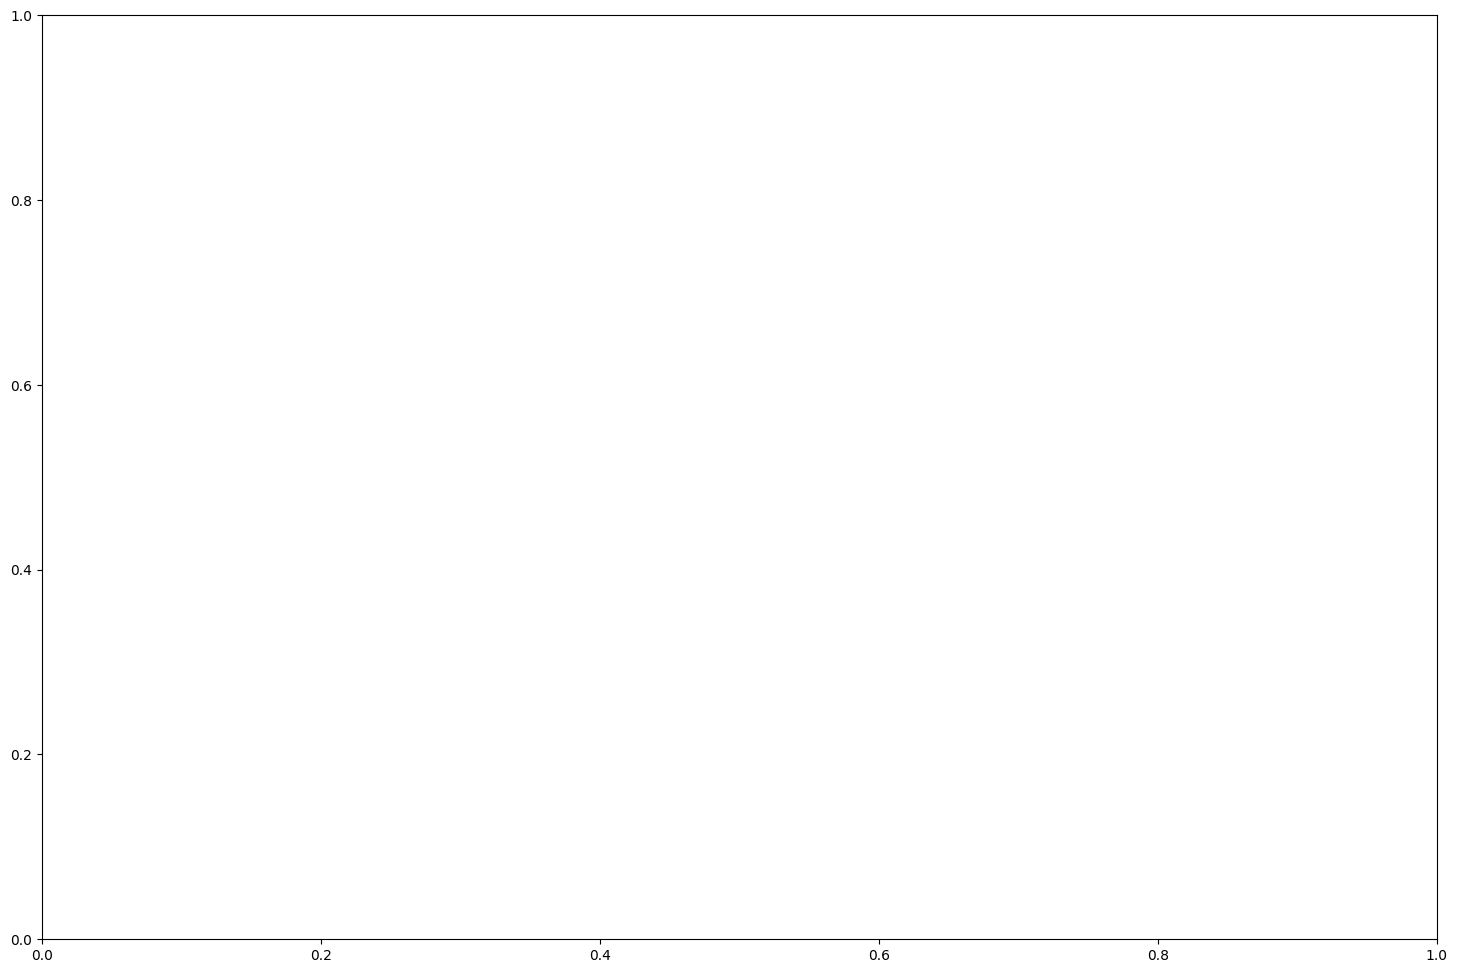

In [70]:
fig, axes = plt.subplots(nrows=len(joints), ncols=1, figsize=(18, 12), sharex=True)
endpoints=(0,4000)
# endpoints=(0,1000)
for i,joint in enumerate(joints):
    axes[i].plot(np.degrees(gt[joint].to_numpy()[endpoints[0]:endpoints[1]]),color=(0,.9,0),label="gt")
    for j,h in enumerate(hz):
        axes[i].plot(np.degrees(our[j][joint].to_numpy()[endpoints[0]:endpoints[1]]),label=f"{round(60/h)} Hz")
    axes[i].set_title(f"Joint {joint}")
    axes[i].legend()

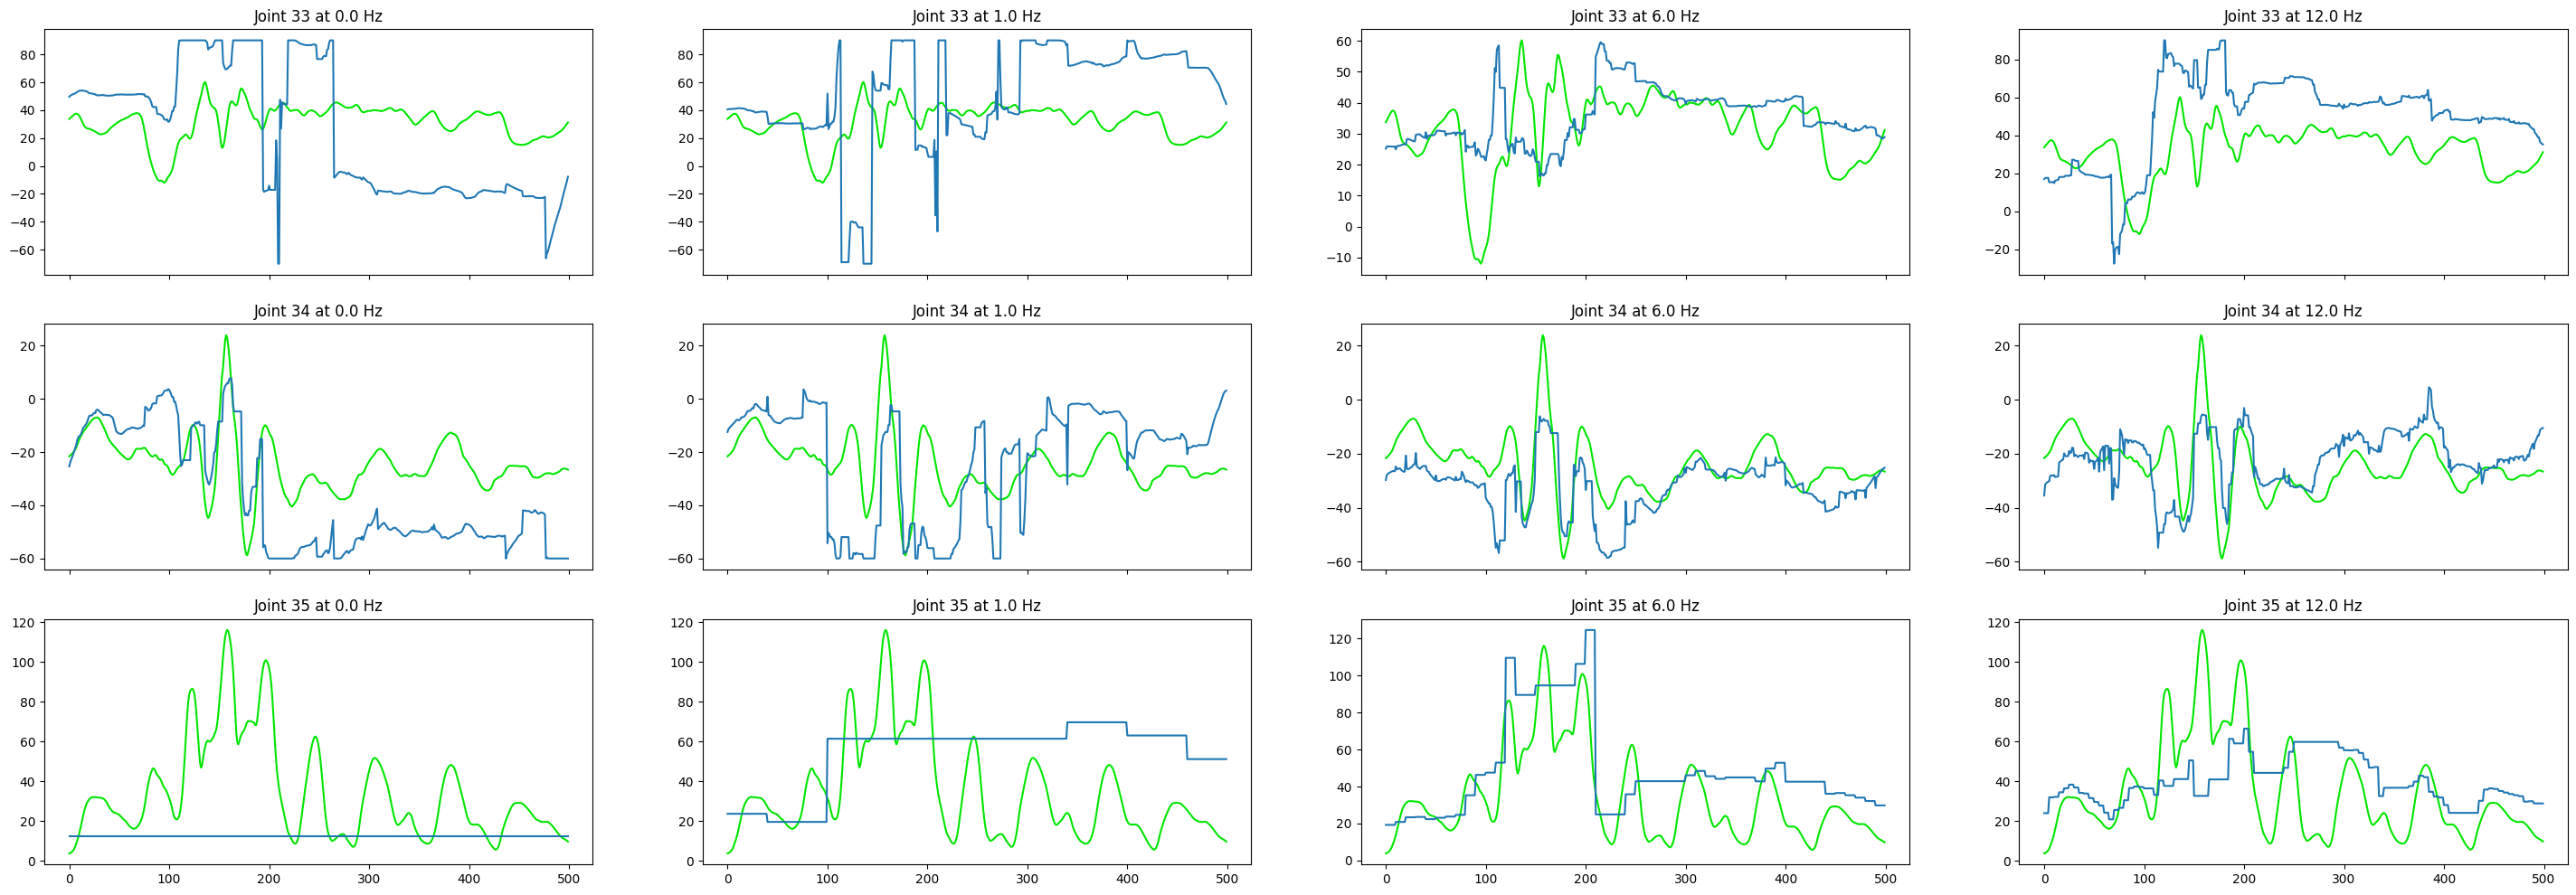

In [44]:
fig, axes = plt.subplots(nrows=len(joints), ncols=len(hz), figsize=(36, 12), sharex=True)
endpoints=(3500,4000)
for j,joint in enumerate(joints):
    for i,h in enumerate(hz):
        axes[j][i].plot(np.degrees(gt[joint].to_numpy()[endpoints[0]:endpoints[1]]),color=(0,.9,0),label="gt")
        axes[j][i].plot(np.degrees(our[i][joint].to_numpy()[endpoints[0]:endpoints[1]]),label=f"{h} Hz")
        axes[j][i].set_title(f"Joint {joint} at {np.round(60/h)} Hz")
        # axes[j][i].legend()

### Cartesian Position

In [56]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import numpy as np

directory = '/home/emartini/nas/MAEVE/HUMAN_MODEL/exoskeleton/new_results/'
subject = 's1'
action = 'acting1'
hz = [9999999,60,10,5]
our = []
comp = []
zv = []
for h in hz:
    o = pd.read_csv(os.path.join(directory,'metrics_our_'+str(h),f"{subject}_{action}",'calc_pos.csv'))
    c = pd.read_csv(os.path.join(directory,'metrics_new_comp_'+str(h),f"{subject}_{action}",'pos_estimation.csv'))
    z = pd.read_csv(os.path.join(directory,'metrics_zerovel_'+str(h),f"{subject}_{action}",'pos_estimation.csv'))

    our_offset = pd.read_csv(os.path.join(directory,'metrics_our_'+str(h),f"{subject}_{action}",'offset.csv')).to_numpy()[:,1:]
    o.iloc[:, 1:] += np.tile(our_offset, (1,12))

    # comp_offset = pd.read_csv(os.path.join(directory,'metrics_new_comp_'+str(h),f"{subject}_{action}",'offset.csv')).to_numpy()[:,1:]
    # c.iloc[:, 1:] -= np.tile(comp_offset, (1,6))
    
    # zv_offset = pd.read_csv(os.path.join(directory,'metrics_zerovel_'+str(h),f"{subject}_{action}",'offset.csv')).to_numpy()[:,1:]
    # zv.iloc[:, 1:] += np.tile(comp_offset, (1,6))

    our.append(o)
    comp.append(c)
    zv.append(z)
gt = pd.read_csv(os.path.join(directory,'metrics_our_1',f"{subject}_{action}",'gt_pos.csv'))

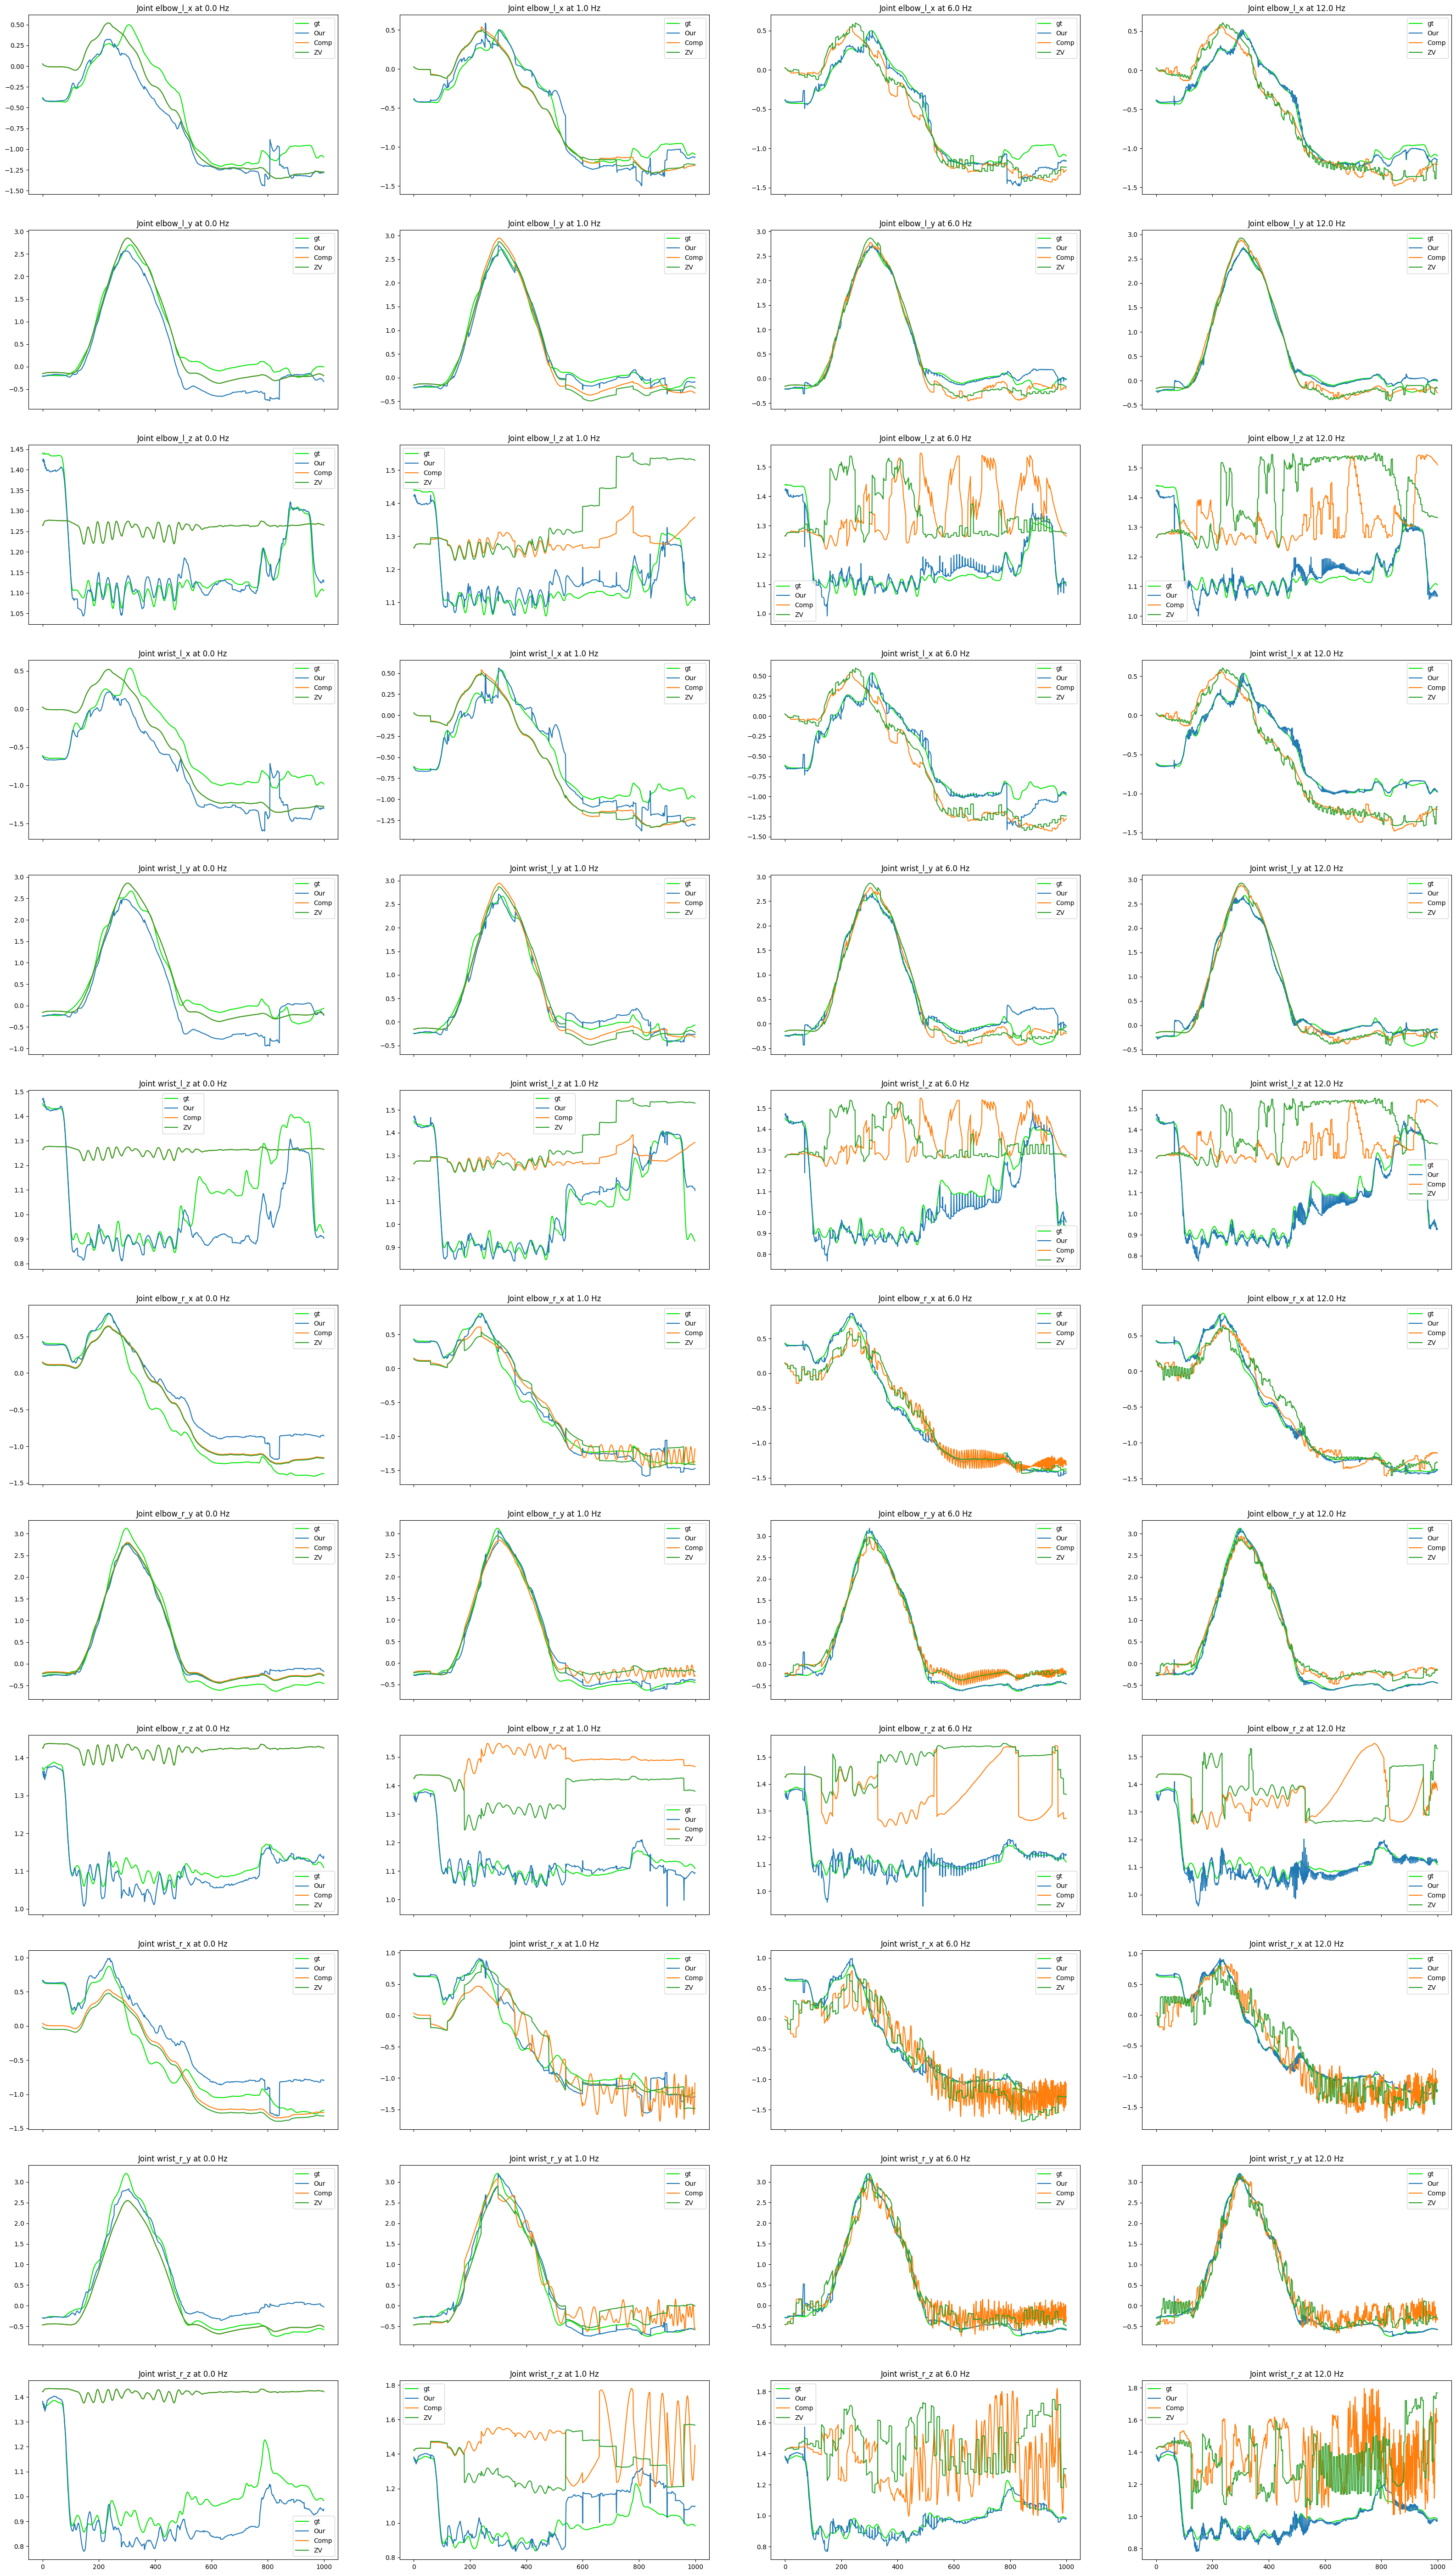

In [57]:
joints = [  'elbow_l_x','elbow_l_y', 'elbow_l_z','wrist_l_x', 'wrist_l_y', 'wrist_l_z',
            'elbow_r_x','elbow_r_y', 'elbow_r_z','wrist_r_x', 'wrist_r_y', 'wrist_r_z',]
fig, axes = plt.subplots(nrows=len(joints), ncols=len(hz), figsize=(10*len(hz), 6*len(joints)), sharex=True)
endpoints=(0,1000)
for j,joint in enumerate(joints):
    for i,h in enumerate(hz):
        axes[j][i].plot(gt[joint].to_numpy()[endpoints[0]:endpoints[1]],color=(0,.9,0),label="gt")
        axes[j][i].plot(our[i][joint].to_numpy()[endpoints[0]:endpoints[1]],label=f"Our")
        axes[j][i].plot(comp[i][joint.replace("_r","_right").replace("_l","_left")].to_numpy()[endpoints[0]:endpoints[1]],label=f"Comp")
        axes[j][i].plot(zv[i][joint.replace("_r","_right").replace("_l","_left")].to_numpy()[endpoints[0]:endpoints[1]],label=f"ZV")
        axes[j][i].set_title(f"Joint {joint} at {np.round(60/h)} Hz")
        axes[j][i].legend()

In [31]:
our[0].columns

Index(['Unnamed: 0', 'walker_knee_r_x', 'walker_knee_r_y', 'walker_knee_r_z',
       'wrist_l_x', 'wrist_l_y', 'wrist_l_z', 'hip_r_x', 'hip_r_y', 'hip_r_z',
       'GlenoHumeral_r_x', 'GlenoHumeral_r_y', 'GlenoHumeral_r_z', 'elbow_l_x',
       'elbow_l_y', 'elbow_l_z', 'hip_l_x', 'hip_l_y', 'hip_l_z', 'elbow_r_x',
       'elbow_r_y', 'elbow_r_z', 'wrist_r_x', 'wrist_r_y', 'wrist_r_z',
       'walker_knee_l_x', 'walker_knee_l_y', 'walker_knee_l_z',
       'GlenoHumeral_l_x', 'GlenoHumeral_l_y', 'GlenoHumeral_l_z', 'ankle_r_x',
       'ankle_r_y', 'ankle_r_z', 'ankle_l_x', 'ankle_l_y', 'ankle_l_z'],
      dtype='object')

## MPJPE Qualitative

In [58]:
subject = 's1'
action = 'acting1'
hz = [9999999,60,10,5]
our = []
for h in hz:
    our.append(pd.read_csv(os.path.join(directory,'metrics_comp_'+str(h),f"{subject}_{action}",'mpjpe.csv')))

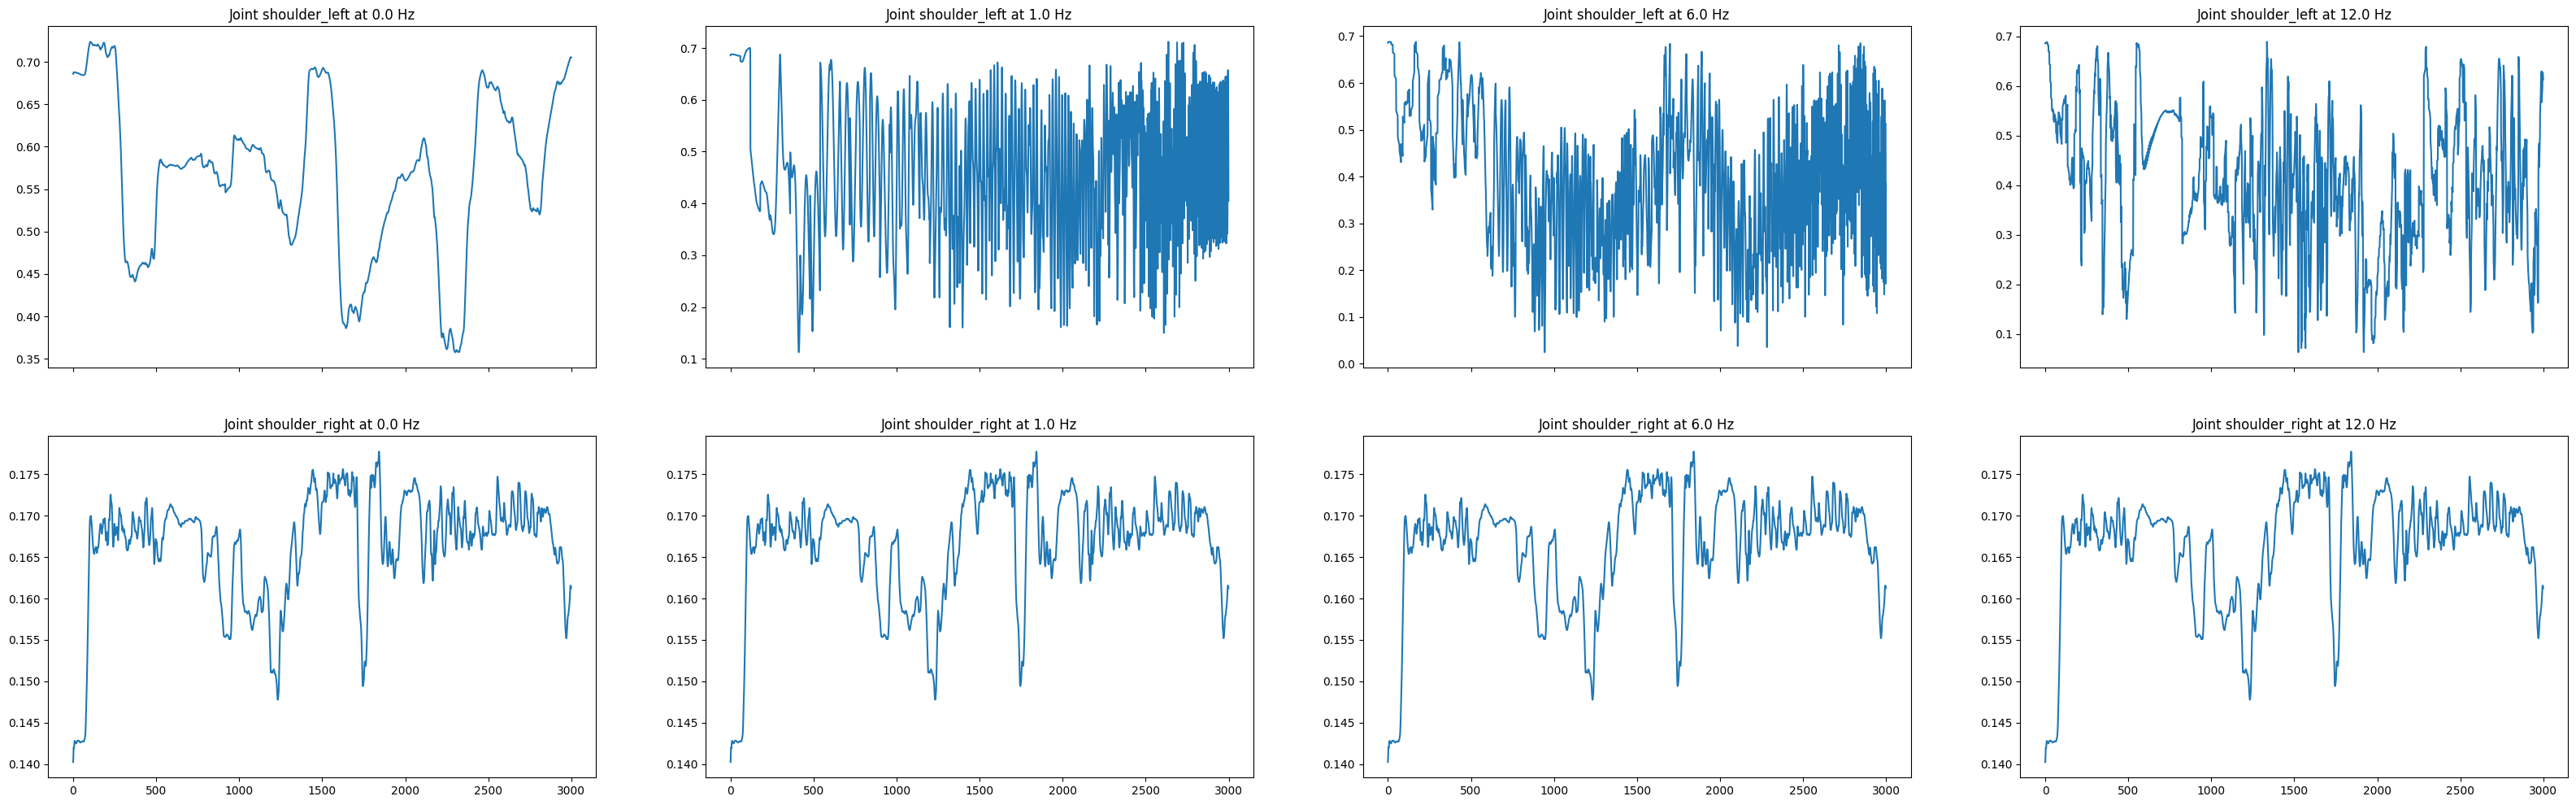

In [59]:
joints = ["shoulder_left", "shoulder_right"]
fig, axes = plt.subplots(nrows=len(joints), ncols=len(hz), figsize=(10*len(hz), 6*len(joints)), sharex=True)
endpoints=(0,3000)
for j,joint in enumerate(joints):
    for i,h in enumerate(hz):
        axes[j][i].plot(our[i][joint].to_numpy()[endpoints[0]:endpoints[1]],label=f"{60/h} Hz")
        axes[j][i].set_title(f"Joint {joint} at {np.round(60/h)} Hz")
        # axes[j][i].set_ylim([0,0.5])
        # axes[j][i].legend()

## MPJPE Quantitative

In [2]:
from pathlib import Path

subfolders = [str(x).split("/")[-1] for x in Path(os.path.join(directory,'metrics_our_10')).rglob('*') if x.is_dir()]
subjects = list(range(1,6))
actions = ['acting','freestyle','rom', 'walking']
hz = [9999999,60,10,5]

kps = ["shoulder_right","elbow_right","wrist_right","shoulder_left","elbow_left","wrist_left"]    

In [5]:
# Our
data = []
for folder in subfolders:
    for h in hz:
        row = ['2our']
        sub = int(folder.split("_")[0][1:])
        action = folder.split("_")[-1][:-1]
        seq = folder.split("_")[-1]
        row.append(sub)
        row.append(action)
        row.append(seq)
        row.append(round(60/h))
        df = pd.read_csv(os.path.join(directory,'metrics_our_'+str(h),folder,'mpjpe.csv'))
        for kp in kps:
            row.append(df[kp].mean())
        row.append(np.mean(df.mean().to_numpy()[1:]))
        data.append(row)

# Comp
for folder in subfolders:
    for h in hz:
        row = ['1comp']
        sub = int(folder.split("_")[0][1:])
        action = folder.split("_")[-1][:-1]
        seq = folder.split("_")[-1]
        row.append(sub)
        row.append(action)
        row.append(seq)
        row.append(round(60/h))
        df = pd.read_csv(os.path.join(directory,'metrics_new_comp_'+str(h),folder,'mpjpe.csv'))
        for kp in kps:
            row.append(df[kp].mean())
        row.append(np.mean(df.mean().to_numpy()[1:]))
        data.append(row)

# ZV
for folder in subfolders:
    for h in hz:
        row = ['0zero_vel']
        sub = int(folder.split("_")[0][1:])
        action = folder.split("_")[-1][:-1]
        seq = folder.split("_")[-1]
        row.append(sub)
        row.append(action)
        row.append(seq)
        row.append(round(60/h))
        df = pd.read_csv(os.path.join(directory,'metrics_zerovel_'+str(h),folder,'mpjpe.csv'))
        for kp in kps:
            row.append(df[kp].mean())
        row.append(np.mean(df.mean().to_numpy()[1:]))
        data.append(row)



header = ["method","subject","action","seq","fps"] + ["mpjpe:"+kp for kp in kps] + ["mpjpe:average"]
report = pd.DataFrame(data,columns=header)

In [8]:
# report[report['subject'] != -1].groupby(["method", "action", "fps"])["mpjpe:average"].mean().round(4) * 1000
# report[report['subject'] == 1][report['action'] == "acting"][report['seq'] == "acting1"]
report.round(2).to_csv("tmp/report.csv")

In [16]:
# 1. Esegui la tua aggregazione e salvala in una variabile (es. 's')
# Nota: ho spostato .mean() prima della selezione della colonna per pulizia, ma funziona anche come hai scritto tu.
s = report[report['subject'] != -1].groupby(["action","method", "fps"])["mpjpe:average"].mean().round(4) * 1000

# 2. Usa unstack per spostare 'action' e 'fps' dall'indice alle colonne
# Questo crea un DataFrame dove l'indice è 'subject' e le colonne sono una MultiIndex
df_wide = s.unstack(level=["fps"])

df_avg = df_wide.groupby("method").mean()

# 2. Aggiungi la colonna 'action' per poter ricreare l'indice
df_avg["action"] = "Average"

# 3. Reimposta l'indice per avere la stessa struttura dell'originale: (action, method)
# Reset -> Set -> Concatenazione
df_avg = df_avg.reset_index().set_index(["action", "method"])

# 4. Unisci il nuovo blocco al DataFrame originale
df_final = pd.concat([df_wide, df_avg]).round(1)


print(df_final)
print(df_final.shape)
df_final.round(1).to_csv("tmp/result_byaction.csv")

fps                      0      1      6     12
action    method                               
acting    0zero_vel  403.3  417.6  428.4  419.0
          1comp      398.4  414.2  419.0  418.0
          2our       332.6  205.2  142.7  124.1
freestyle 0zero_vel  404.5  404.3  408.7  415.3
          1comp      406.9  419.4  419.0  419.4
          2our       409.2  286.1  217.4  200.4
rom       0zero_vel  412.4  440.9  440.8  437.6
          1comp      416.5  435.1  434.6  430.6
          2our       297.4  174.0  129.0  120.1
walking   0zero_vel  414.3  430.2  434.4  441.9
          1comp      415.6  433.4  430.0  430.2
          2our       333.3  200.4  112.1   94.6
Average   0zero_vel  408.6  423.2  428.1  428.4
          1comp      409.4  425.5  425.6  424.6
          2our       343.1  216.4  150.3  134.8
(15, 4)


In [10]:
# 1. Esegui la tua aggregazione e salvala in una variabile (es. 's')
# Nota: ho spostato .mean() prima della selezione della colonna per pulizia, ma funziona anche come hai scritto tu.
s = report[report['fps'] != 6][report['fps'] != 1].groupby(["action","method","fps"]).mean().round(4)*1000
# s = report[report['fps'] != -1].groupby(["method","action","fps"]).mean().round(2)

# 2. Usa unstack per spostare 'action' e 'fps' dall'indice alle colonne
# Questo crea un DataFrame dove l'indice è 'subject' e le colonne sono una MultiIndex
df_wide = s.unstack(level=["fps"])
df_wide = df_wide.drop(columns=['subject'])
# 3. Appiattisci le colonne nel formato richiesto "azione:fps"
# df_wide.columns è ora una lista di tuple tipo [('walking', 0), ('walking', 1)...]
# df_wide.columns = [f"{act}:{fps}" for act, fps in df_wide.columns]

# (Opzionale) Se vuoi 'subject' come colonna normale e non come indice
# df_wide = df_wide.reset_index()
# df_wide.loc['Average'] = df_wide.mean(numeric_only=True)
print(df_wide.shape)
print(df_wide)

df_wide.round(1).to_csv("tmp/result_bykps.csv")

(12, 14)
                    mpjpe:shoulder_right        mpjpe:elbow_right         \
fps                                   0      12                0      12   
action    method                                                           
acting    0zero_vel                173.4  173.4             430.7  422.4   
          1comp                    173.4  173.4             430.0  418.5   
          2our                     218.4   89.9             337.6  106.0   
freestyle 0zero_vel                169.5  169.5             400.7  416.8   
          1comp                    169.5  169.5             403.5  414.2   
          2our                     276.4  151.3             398.9  183.4   
rom       0zero_vel                168.0  168.0             365.3  424.5   
          1comp                    168.0  168.0             373.8  413.1   
          2our                     210.9   86.8             318.4  112.4   
walking   0zero_vel                177.4  177.4             439.8  426.2   
   

/home/emartini/COMETH/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# 1. Esegui la tua aggregazione e salvala in una variabile (es. 's')
# Nota: ho spostato .mean() prima della selezione della colonna per pulizia, ma funziona anche come hai scritto tu.
s = report[report['fps'] != 6].groupby(["method","action","fps"]).mean().round(4) * 1000

# 2. Usa unstack per spostare 'action' e 'fps' dall'indice alle colonne
# Questo crea un DataFrame dove l'indice è 'subject' e le colonne sono una MultiIndex
df_wide = s.unstack(level=["fps"])
df_wide = df_wide.drop(columns=['subject'])
# 3. Appiattisci le colonne nel formato richiesto "azione:fps"
# df_wide.columns è ora una lista di tuple tipo [('walking', 0), ('walking', 1)...]
# df_wide.columns = [f"{act}:{fps}" for act, fps in df_wide.columns]

# (Opzionale) Se vuoi 'subject' come colonna normale e non come indice
# df_wide = df_wide.reset_index()
# df_wide.loc['Average'] = df_wide.mean(numeric_only=True)
print(df_wide)
df_wide.round(1).to_csv("tmp/result_bykps.csv")

         mpjpe:shoulder_right               mpjpe:elbow_right                \
fps                        0      1      12                0      1      12   
method                                                                        
comp                    172.0  172.0  172.0             393.2  411.9  415.1   
our                     234.5  143.1  103.8             351.8  214.4  122.1   
zero_vel                172.0  172.0  172.0             408.7  412.3  422.2   

         mpjpe:wrist_right               mpjpe:shoulder_left  ...         \
fps                     0      1      12                  0   ...     12   
method                                                        ...          
comp                 621.9  595.1  609.7               595.7  ...  414.1   
our                  469.0  299.3  171.6               223.3  ...  106.3   
zero_vel             685.3  613.2  618.4               397.4  ...  403.2   

         mpjpe:elbow_left               mpjpe:wrist_left            